In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy
import neurolib.utils.devutils as du

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
from neurolib.utils.loadData import Dataset
from scipy.io import loadmat
from neurolib.utils.loadData import filterSubcortical

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
input_excext = [0., 0.03061224, 0.06122449, 0.09183673, 0.12244898, 0.15306122,
 0.18367347, 0.21428571, 0.24489796, 0.2755102,  0.30612245, 0.33673469,
 0.36734694, 0.39795918, 0.42857143, 0.45918367, 0.48979592, 0.52040816,
 0.55102041, 0.58163265, 0.6122449,  0.64285714, 0.67346939, 0.70408163,
 0.73469388, 0.76530612, 0.79591837, 0.82653061, 0.85714286, 0.8877551,
 0.91836735, 0.94897959, 0.97959184, 1.01020408, 1.04081633, 1.07142857,
 1.10204082, 1.13265306, 1.16326531, 1.19387755, 1.2244898, 1.25510204,
 1.28571429, 1.31632653, 1.34693878, 1.37755102, 1.40816327, 1.43877551,
 1.46938776, 1.5]
gbc_model_excext = [0.9992588753070569, 0.9992100125279667, 0.9991938827327792, 0.9991903655214601, 0.9991427578332945, 0.9991254196732119, 0.9990499300820903, 0.9990391811168111, 0.9988235726913284, 0.9989189645464197, 0.9987891130227442, 0.9988120950500218, 0.9981639477407532, 0.9979520132091839, 0.9451250732064633, 0.6249072828567749, 0.810083542720737, 0.6905635894633222, 0.7122553244728533, 0.8400588346104746, 0.9246383731076184, 0.7882764221391549, 0.7652448221875917, 0.8545384193719109, 0.8413110562807046, 0.897496087908591, 0.9070726371387501, 0.8898869371692393, 0.8784424073042874, 0.8486824745275129, 0.890757860507846, 0.8290248359421409, 0.7822308261395312, 0.7961780000764281, 0.8175765157309965, 0.8390500478867403, 0.9570750305867977, 0.9952196361331531, 0.9989479358274272, 0.9999957951159654, 0.9999975690040245, 0.9999982147187987, 0.9999982636254692, 0.9999986931583584, 0.9999986316407685, 0.9999988773201685, 0.9999989913349439, 0.9999991337676295, 0.9999991750079665, 0.9999991778398136]

In [3]:
input_cinhexc = [ 5.,          5.1010101,   5.2020202,   5.3030303,   5.4040404,   5.50505051,
  5.60606061, 5.70707071,  5.80808081,  5.90909091,  6.01010101,  6.11111111,
  6.21212121,  6.31313131,  6.41414141,  6.51515152,  6.61616162,  6.71717172,
  6.81818182,  6.91919192,  7.02020202,  7.12121212,  7.22222222,  7.32323232,
  7.42424242, 7.52525253, 7.62626263,  7.72727273,  7.82828283,  7.92929293,
  8.03030303,  8.13131313,  8.23232323,  8.33333333,  8.43434343,  8.53535354,
  8.63636364, 8.73737374,  8.83838384,  8.93939394,  9.04040404,  9.14141414,
  9.24242424,  9.34343434,  9.44444444,  9.54545455,  9.64646465,  9.74747475,
  9.84848485,  9.94949495, 10.05050505, 10.15151515, 10.25252525, 10.35353535,
 10.45454545, 10.55555556, 10.65656566, 10.75757576, 10.85858586, 10.95959596,
 11.06060606, 11.16161616, 11.26262626, 11.36363636, 11.46464646, 11.56565657,
 11.66666667, 11.76767677, 11.86868687, 11.96969697, 12.07070707, 12.17171717,
 12.27272727, 12.37373737, 12.47474747, 12.57575758, 12.67676768, 12.77777778,
 12.87878788, 12.97979798, 13.08080808, 13.18181818, 13.28282828, 13.38383838,
 13.48484848, 13.58585859, 13.68686869, 13.78787879, 13.88888889, 13.98989899,
 14.09090909, 14.19191919, 14.29292929, 14.39393939, 14.49494949, 14.5959596,
 14.6969697,  14.7979798,  14.8989899,  15.        ]
gbc_model_cinhexc = [0.9999956101959053, 0.9999948922410249, 0.9999955124717672, 0.9999965310031855, 0.999996166072652, 0.9999955719481289, 0.9999960440353601, 0.9999950376569237, 0.9999942780938685, 0.999994128886567, 0.9999945231709995, 0.999994329791306, 0.9999937993087635, 0.9999944667377363, 0.9999954829306366, 0.9999931358220286, 0.9999930713226491, 0.9999934336833582, 0.9999933745672959, 0.9999942020486597, 0.999992616485843, 0.9999931324416315, 0.9999893818514215, 0.9999904678813355, 0.9999908417533951, 0.9999897432698391, 0.999991139616927, 0.9999924896371644, 0.9999900841869612, 0.9999895665095997, 0.9999874759322194, 0.9548893190846428, 0.8519369927973475, 0.6102710714044555, 0.5210570786539921, 0.44247635939782753, 0.27909112707904815, 0.3015116958110085, 0.2954889429964357, 0.30612353498501355, 0.6592573794139139, 0.6965241741981731, 0.7616512105679141, 0.6379335633553069, 0.9064736726222558, 0.6072306286357363, 0.4108070797019052, 0.41320674250918316, 0.3621813654959897, 0.27759662934214285, 0.5846683645178774, 0.9621692967907002, 0.9578795931834618, 0.9856168473510281, 0.9857567608637129, 0.9740336018982763, 0.956894882799391, 0.9926665751637717, 0.989888237469766, 0.9948540441705919, 0.8464918810298133, 0.996389077130475, 0.9971201132706865, 0.9975695250873163, 0.9973392064701915, 0.99742806453659, 0.997833725364915, 0.9976861989606596, 0.9978854856099056, 0.9979649909583779, 0.9979329841818877, 0.9980398479604464, 0.9980030669417943, 0.9979777824878064, 0.9980919840461389, 0.9980969152547818, 0.998272500371188, 0.9981537026589976, 0.9981835295344592, 0.9982174795333282, 0.9983749464091034, 0.9982926317082891, 0.9983143762455389, 0.9985764834572339, 0.9984333578155207, 0.9984743219200323, 0.9983721207203675, 0.9985702600683761, 0.998390092206607, 0.9985139648986002, 0.9984827275481061, 0.9986171937335535, 0.9985910783136944, 0.9986734213819156, 0.9984766853722654, 0.9985219908041699, 0.998687136851249, 0.9986399207212949, 0.9986156555783112, 0.9986192557719598]

In [4]:
input_cexcinh = [ 5.,          5.1010101,   5.2020202,   5.3030303,   5.4040404,   5.50505051,
  5.60606061, 5.70707071,  5.80808081,  5.90909091,  6.01010101,  6.11111111,
  6.21212121,  6.31313131,  6.41414141,  6.51515152,  6.61616162,  6.71717172,
  6.81818182,  6.91919192,  7.02020202,  7.12121212,  7.22222222,  7.32323232,
  7.42424242, 7.52525253, 7.62626263,  7.72727273,  7.82828283,  7.92929293,
  8.03030303,  8.13131313,  8.23232323,  8.33333333,  8.43434343,  8.53535354,
  8.63636364, 8.73737374,  8.83838384,  8.93939394,  9.04040404,  9.14141414,
  9.24242424,  9.34343434,  9.44444444,  9.54545455,  9.64646465,  9.74747475,
  9.84848485,  9.94949495, 10.05050505, 10.15151515, 10.25252525, 10.35353535,
 10.45454545, 10.55555556, 10.65656566, 10.75757576, 10.85858586, 10.95959596,
 11.06060606, 11.16161616, 11.26262626, 11.36363636, 11.46464646, 11.56565657,
 11.66666667, 11.76767677, 11.86868687, 11.96969697, 12.07070707, 12.17171717,
 12.27272727, 12.37373737, 12.47474747, 12.57575758, 12.67676768, 12.77777778,
 12.87878788, 12.97979798, 13.08080808, 13.18181818, 13.28282828, 13.38383838,
 13.48484848, 13.58585859, 13.68686869, 13.78787879, 13.88888889, 13.98989899,
 14.09090909, 14.19191919, 14.29292929, 14.39393939, 14.49494949, 14.5959596,
 14.6969697,  14.7979798,  14.8989899,  15.        ]
gbc_model_cexcinh = [0.9999899832589625, 0.9999929309454225, 0.9999914872982784, 0.9999914345941417, 0.9999880328455174, 0.9999902318305778, 0.9999860863006846, 0.9999912347417299, 0.9999884124265571, 0.9999880580102498, 0.9999920044872337, 0.9999913241289952, 0.9999929794547711, 0.9999891617516304, 0.9999891330489228, 0.9999905833071474, 0.999991326577221, 0.9999876923240398, 0.999988265771969, 0.9999882135295036, 0.9999898003408353, 0.9999904687975342, 0.9999866298462772, 0.9999858411486077, 0.9999876956893985, 0.9999844974028949, 0.9999875270427871, 0.999991062041864, 0.9999844574937333, 0.9999846240849505, 0.9594509918999689, 0.8593542519184778, 0.4228835939182343, 0.5160771734595451, 0.40986825705294794, 0.37428145909997007, 0.23005871651050996, 0.6340317772674837, 0.547874107596766, 0.6152133974178278, 0.6257528307569733, 0.7054864157986933, 0.7452064895538625, 0.7729074898038819, 0.8044259492371282, 0.8028116646614367, 0.5115049803493058, 0.41204055763950764, 0.9470027467369496, 0.7217061460048373, 0.5200366694561214, 0.5367581762091421, 0.6694237408184607, 0.5649360826095188, 0.4915428091494677, 0.3783837341727998, 0.4136444986521155, 0.47170563447321373, 0.25247865511344436, 0.9797740105288574, 0.9804747561032383, 0.9793917310617352, 0.9855480341175586, 0.9831747069808816, 0.9893797789823775, 0.9762949595189319, 0.9906855947832633, 0.9929443096897288, 0.9888552617427324, 0.9858462308712032, 0.996439076842305, 0.9970734660821313, 0.9975759456663724, 0.997436696140276, 0.9977022077988681, 0.9978290364752905, 0.9978370390118582, 0.9979331450019544, 0.9982927130785615, 0.998098012543814, 0.9981854070438217, 0.9982810894294174, 0.9983724201948943, 0.9983885799744417, 0.9982985158320256, 0.9984930772159014, 0.9984418030967213, 0.9986386202132038, 0.998562324690958, 0.998701595452296, 0.998598126065639, 0.9987286714671533, 0.9987299966874486, 0.998610223103619, 0.998688984038437, 0.9987670282765453, 0.9987134752203793, 0.9986321212997723, 0.9988030433771721, 0.998681307681967]

In [5]:
input_cinhinh = [0.,         0.10204082, 0.20408163, 0.30612245, 0.40816327, 0.51020408,
 0.6122449,  0.71428571, 0.81632653, 0.91836735, 1.02040816, 1.12244898,
 1.2244898,  1.32653061, 1.42857143, 1.53061224, 1.63265306, 1.73469388,
 1.83673469, 1.93877551, 2.04081633, 2.14285714, 2.24489796, 2.34693878,
 2.44897959, 2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
 3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776, 3.57142857,
 3.67346939, 3.7755102,  3.87755102, 3.97959184, 4.08163265, 4.18367347,
 4.28571429, 4.3877551,  4.48979592, 4.59183673, 4.69387755, 4.79591837,
 4.89795918, 5.        ]
gbc_model_cinhinh = [0.6110798021057731, 0.5844751119550621, 0.7255344179600083, 0.6853401896691438, 0.5118583285284583, 0.5299937528023606, 0.3648297153268759, 0.29284847681148, 0.5039645607695147, 0.5135406099224888, 0.649376561399352, 0.7720964416518757, 0.7376912094803258, 0.698500704177288, 0.6437048683809178, 0.3938442108227433, 0.3011835856228642, 0.2385870932105395, 0.33383145120558516, 0.3167346544132467, 0.3092827241937463, 0.3941264696105388, 0.852791546397759, 0.945528522331898, 0.9999753866215698, 0.9999874564221148, 0.9999777825297772, 0.9999770216978524, 0.9999718455936077, 0.9999736018246362, 0.9999676170402851, 0.999974112971428, 0.9999765766260543, 0.999976596531718, 0.9999768658138302, 0.9999702106514045, 0.9999724791048142, 0.9999864991905306, 0.9999718288585586, 0.9999831256796017, 0.9999863533773599, 0.9999827587757381, 0.9999777770609363, 0.9999803273023119, 0.9999860012079489, 0.9999845783119422, 0.9999775822714504, 0.9999836472545519, 0.9999821726474923, 0.9999818699179925]

In [6]:
input_sigma_ou = [0.,         0.04081633, 0.08163265, 0.12244898, 0.16326531, 0.20408163,
 0.24489796, 0.28571429, 0.32653061, 0.36734694, 0.40816327, 0.44897959,
 0.48979592, 0.53061224, 0.57142857, 0.6122449,  0.65306122, 0.69387755,
 0.73469388, 0.7755102, 0.81632653, 0.85714286, 0.89795918, 0.93877551,
 0.97959184, 1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
 1.2244898,  1.26530612, 1.30612245, 1.34693878, 1.3877551,  1.42857143,
 1.46938776, 1.51020408, 1.55102041, 1.59183673, 1.63265306, 1.67346939,
 1.71428571, 1.75510204, 1.79591837, 1.83673469, 1.87755102, 1.91836735,
 1.95918367, 2.        ]
gbc_model_sigma_ou = [0.45780667281051535, 0.01604277917901904, 0.029298192281174675, 0.023960040273114557, 0.021383790989089456, 0.015964508302843638, 0.01960974527425139, 0.005250873287698335, 0.006352841375561027, 0.007576720070422535, 0.011083893408079764, 0.01114959212922461, 0.029139787765295848, 0.01061862656586577, 0.017157915926730816, 0.021703931355835503, 0.01001119666701838, 0.013647883511671904, 0.019326503584295326, 0.00958553080621367, 0.025631910640004273, 0.01578297618910047, 0.013119434316543978, 0.013322293568513818, 0.0054137455445688746, 0.012607147277782244, 0.0037015822083383354, 0.02111341214397257, 0.020883695905747953, 0.01996468099564051, 0.01693646422457318, 0.010204328796322621, 0.0114669035522627, 0.008090527532916357, 0.004531106629057132, 0.012116919181344445, 0.01998356192744372, 0.011948836982544056, 0.006079868581354684, 0.006082251594994292, 0.014301203243320473, 0.014927484240775803, 0.008125185627662639, 0.009330179664911476, 0.01984125228579211, 0.007424823334129282, 0.018424704502528467, 0.008002005065396063, 0.009278776646308919, 0.010492342289769927]

In [7]:
input_k_gl = [0.,         0.05102041, 0.10204082, 0.15306122, 0.20408163, 0.25510204,
 0.30612245, 0.35714286, 0.40816327, 0.45918367, 0.51020408, 0.56122449,
 0.6122449,  0.66326531, 0.71428571, 0.76530612, 0.81632653, 0.86734694,
 0.91836735, 0.96938776, 1.02040816, 1.07142857, 1.12244898, 1.17346939,
 1.2244898,  1.2755102, 1.32653061, 1.37755102, 1.42857143, 1.47959184,
 1.53061224, 1.58163265, 1.63265306, 1.68367347, 1.73469388, 1.78571429,
 1.83673469, 1.8877551,  1.93877551, 1.98979592, 2.04081633, 2.09183673,
 2.14285714, 2.19387755, 2.24489796, 2.29591837, 2.34693878, 2.39795918,
 2.44897959, 2.5     ] 

gbc_model_k_gl = [0.997974718990032, 0.9980782122348092, 0.9979652057927081, 0.9980847359492548, 0.998087166064762, 0.9981318510322166, 0.997848895279307, 0.9980378767397704, 0.9979682314499533, 0.9978691288103527, 0.9979614830735241, 0.9977545628216017, 0.9977238553293233, 0.9975732941189933, 0.9975305238670643, 0.9976256496216807, 0.9974055301065831, 0.9972683590803438, 0.9971895867759446, 0.9971445231145101, 0.9967200362908056, 0.9529838260620025, 0.9590479175742982, 0.93941642308838, 0.9122385456118606, 0.9028369074199754, 0.8747852729516572, 0.9590385354954016, 0.9482690512169927, 0.9788786097663916, 0.7862047034139346, 0.4639443812411237, 0.11099633353692892, 0.39287597705817845, 0.22327275390773893, 0.3986353546543323, 0.5620007399536529, 0.43341101818027367, 0.651691457499059, 0.3250754739245454, 0.6974070824841198, 0.6425827336247011, 0.35297316204185164, 0.8362818167401468, 0.7963248907191882, 0.7685935844657265, 0.7507132665729068, 0.7267004793229979, 0.7033201390526542, 0.6822867495566443]

In [8]:
print(gbc_model_k_gl.index(min(gbc_model_k_gl)))

32


In [9]:
input_k_gl[32]

1.63265306

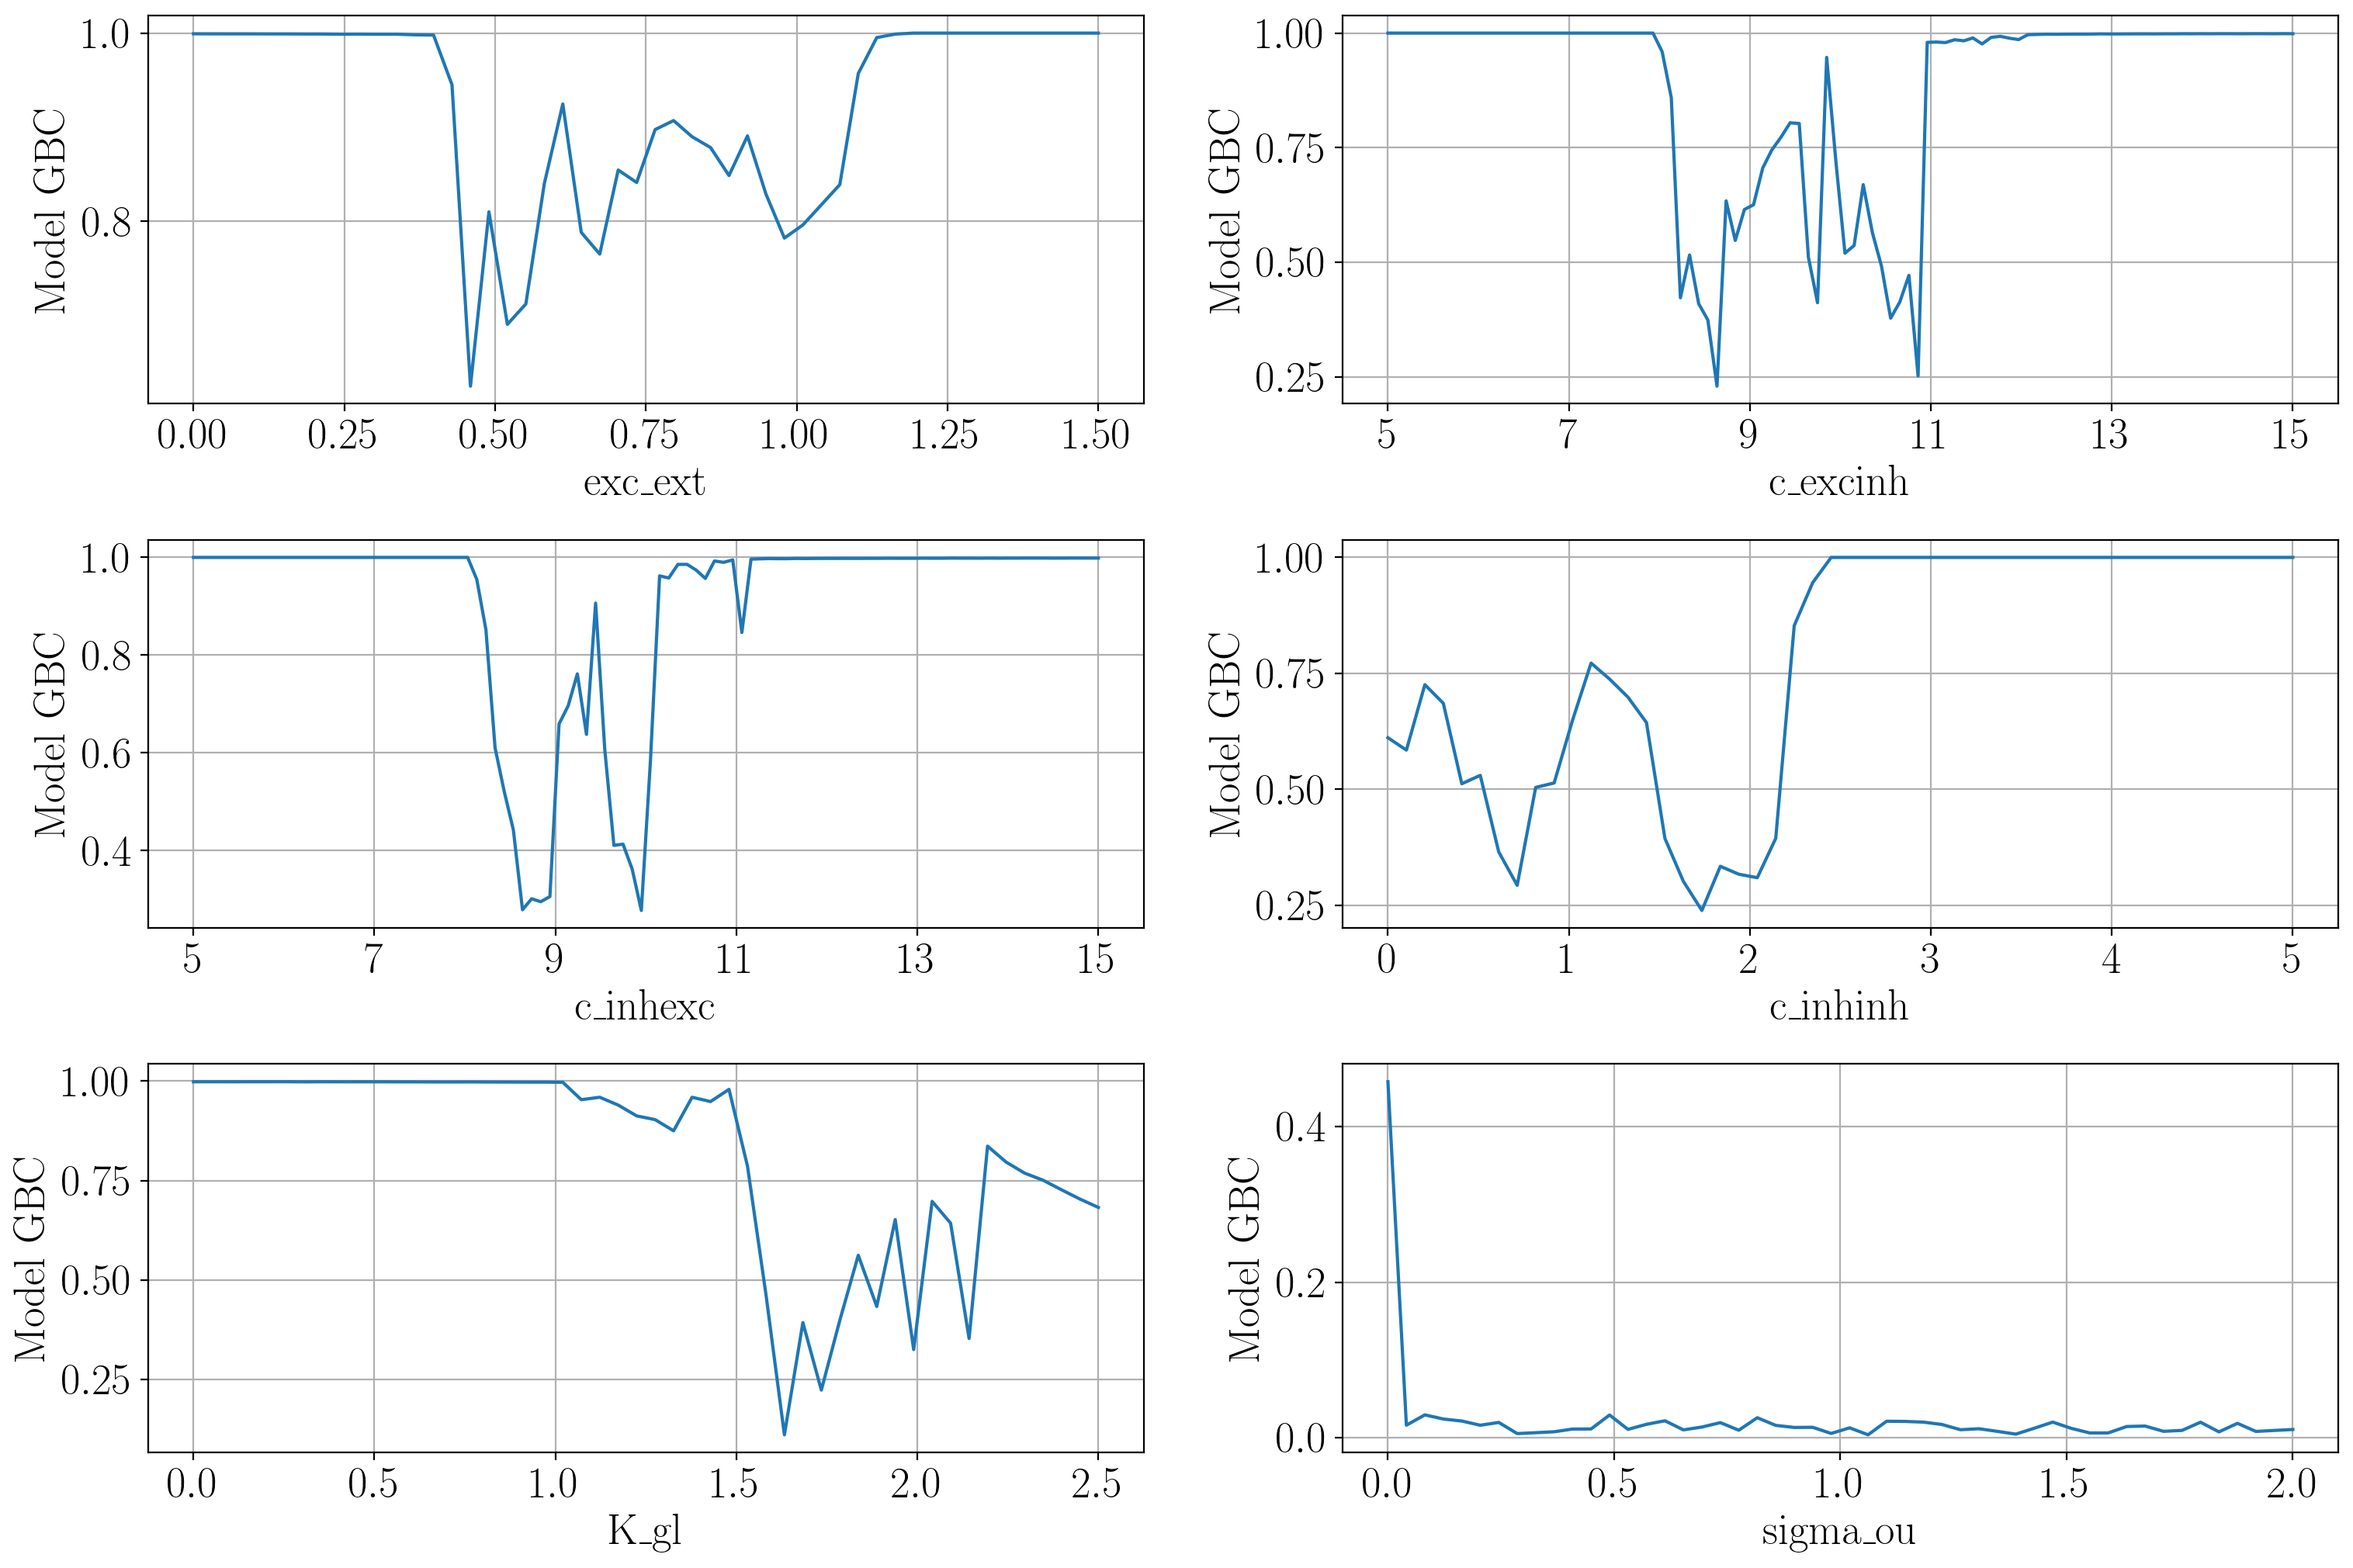

In [10]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math

# Get the angles from 0 to 2 pie (360 degree) in narray object
#X = np.arange(0, math.pi*2, 0.05)

# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
#Y1 = np.sin(X)
#Y2 = np.cos(X)
#Y3 = np.tan(X)
#Y4 = np.tanh(X)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(3, 2, figsize=(15,10))
figure.tight_layout()

axis[0, 0].plot(input_excext,gbc_model_excext)
axis[0, 0].set_xlabel("exc_ext", size=20)
axis[0, 0].set_ylabel('Model GBC', size=20)
axis[0, 0].grid()


axis[0, 1].plot(input_cexcinh,gbc_model_cexcinh)
axis[0, 1].set_xlabel("c_excinh", size=20)
axis[0, 1].set_ylabel('Model GBC', size=20)
axis[0, 1].set_xticks(range(5, 16, 2))
axis[0, 1].grid()

axis[1, 0].plot(input_cinhexc,gbc_model_cinhexc)
axis[1, 0].set_xlabel("c_inhexc", size=20)
axis[1, 0].set_ylabel('Model GBC', size=20)
axis[1, 0].set_xticks(range(5, 16, 2))
axis[1, 0].grid()

axis[1, 1].plot(input_cinhinh,gbc_model_cinhinh)
axis[1, 1].set_xlabel("c_inhinh", size=20)
axis[1, 1].set_ylabel('Model GBC', size=20)
axis[1, 1].grid()

axis[2, 0].plot(input_k_gl,gbc_model_k_gl)
axis[2, 0].set_xlabel("K_gl",size=20)
axis[2, 0].set_ylabel('Model GBC', size=20)
axis[2, 0].grid()

axis[2, 1].plot(input_sigma_ou,gbc_model_sigma_ou)
axis[2, 1].set_xlabel("sigma_ou", size=20)
axis[2, 1].set_ylabel('Model GBC',size=20)
axis[2, 1].grid()

#figure.suptitle('Change in GBC based on parameters')

# Combine all the operations and display
figure.subplots_adjust(wspace=0.2)
figure.subplots_adjust(hspace=0.35)
figure.set_facecolor('w') 
figure.savefig('exploration.png', bbox_inches='tight')